In [1]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load model and vectorizer
model = joblib.load("emotion_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [5]:
# Load your test data
test_df = pd.read_csv("test.csv")  
X_test_text = test_df['text']
y_true = test_df['emotion']

# Transform text to vectors
X_test = vectorizer.transform(X_test_text)


In [6]:
# Predict
y_pred = model.predict(X_test)

# Classification report
report = classification_report(y_true, y_pred, output_dict=False)
print(report)


              precision    recall  f1-score   support

       anger       0.90      0.83      0.86       275
        fear       0.88      0.78      0.83       224
         joy       0.84      0.96      0.90       695
        love       0.83      0.61      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.85      0.53      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.87      2000



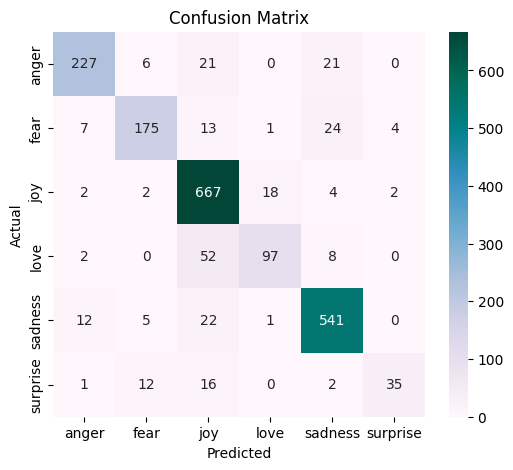

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=model.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="PuBuGn", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
